In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [5]:
# Se carga el dataset que he limpiado y preparado para el análisis visual
df = pd.read_csv("../datasets/wines_SPA_cleaned.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   winery                 2048 non-null   object 
 1   wine                   2048 non-null   object 
 2   year                   1976 non-null   float64
 3   rating                 2048 non-null   float64
 4   rating_norm            2048 non-null   float64
 5   price                  2048 non-null   float64
 6   price_group            2048 non-null   object 
 7   region                 2048 non-null   object 
 8   body                   2025 non-null   float64
 9   acidity                2025 non-null   float64
 10  quality_price_percent  2048 non-null   float64
dtypes: float64(7), object(4)
memory usage: 176.1+ KB


In [ ]:
# Las preguntas que quiero responder con los gráficos son:

    # 1. ¿Cuál es la distribución de los precios de los vinos españoles?
    # 3. Qué vinos tienen la mejor calidad-precio
    # 3. Factores que influyen más en la percepción de calidad y precio por parte de los clientes
    # 4. Identificar las regiones de España con mejor valoración de vinos
    # 5. Segmentar clientes según preferencias y hábitos de compra para campañas de marketing

#### Boxplot para el grupo de precios 'low'

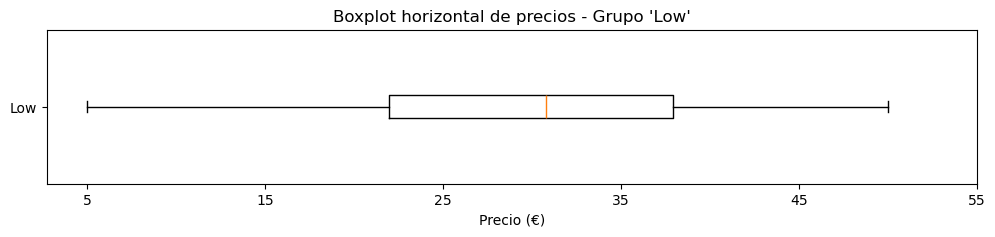

In [30]:
# Boxplot horizontal para grupo 'low'
low_prices = df[df['price_group'] == 'low']['price']
plt.figure(figsize=(12, 2))
plt.boxplot(low_prices, vert=False)
plt.title("Boxplot horizontal de precios - Grupo 'Low'")
plt.xlabel('Precio (€)')
min_tick = 5
max_price = int(low_prices.max())
plt.xticks(np.arange(min_tick, max_price+10, 10))
plt.yticks([1], ['Low'])
plt.show()

#### Boxplot horizontal para grupo 'mid' (ticks cada 50 €)

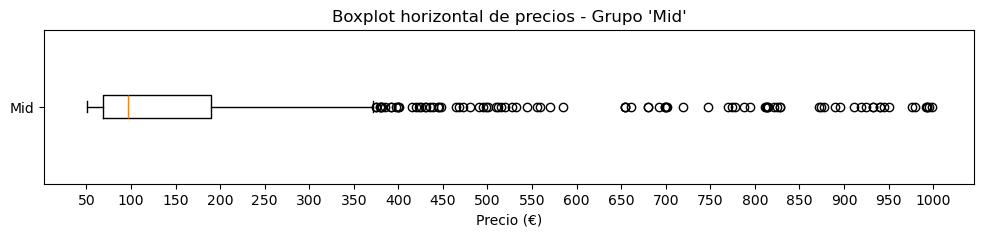

In [19]:
# Boxplot horizontal para grupo 'mid'
mid_prices = df[df['price_group'] == 'mid']['price']
plt.figure(figsize=(12, 2))
plt.boxplot(mid_prices, vert=False)
plt.title("Boxplot horizontal de precios - Grupo 'Mid'")
plt.xlabel('Precio (€)')
min_price = int(mid_prices.min())
max_price = int(mid_prices.max())
plt.xticks(np.arange(min_price, max_price+50, 50))
plt.yticks([1], ['Mid'])
plt.show()

#### Boxplot horizontal para grupo 'high' (ticks cada 100 €)

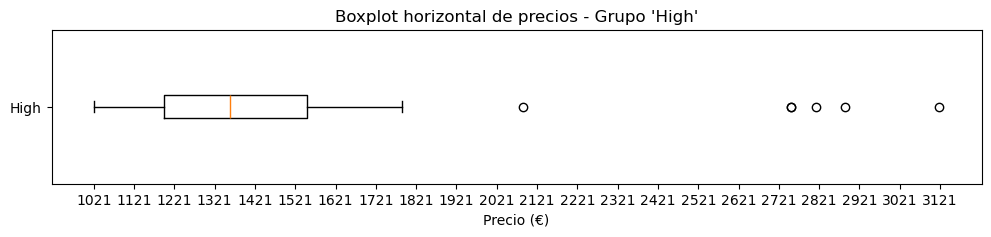

In [20]:
# Boxplot horizontal para grupo 'high'
high_prices = df[df['price_group'] == 'high']['price']
plt.figure(figsize=(12, 2))
plt.boxplot(high_prices, vert=False)
plt.title("Boxplot horizontal de precios - Grupo 'High'")
plt.xlabel('Precio (€)')
min_price = int(high_prices.min())
max_price = int(high_prices.max())
plt.xticks(np.arange(min_price, max_price+100, 100))
plt.yticks([1], ['High'])
plt.show()